In [2]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import linear_regression as clf
from learning_rate import *
import model
from data_process import load_data
import seaborn as sns
import time

%matplotlib inline
%load_ext autoreload
%autoreload 1

# Task 1

In [124]:
with open("data/reddit.json") as fp:
    data = json.load(fp)

In [125]:
sz_tr=10000; sz_val=1000; sz_test=1000

train = data[:sz_tr]
val = data[sz_tr:sz_tr+sz_val]
test = data[sz_tr+sz_val:]

In [154]:
train = pd.DataFrame.from_records(train)
train.describe()

,children,controversiality,is_root,popularity_score,text
0,0,0,False,1.254698,ITS RAINING SIDEWAYS
1,0,0,False,0.509813,Wheel of time reader confirmed!
2,0,0,True,0.370827,The jungle book of pussy
3,0,0,False,-0.272843,I'm just making this thread since there is an ...
4,0,0,True,0.560150,"Hi there, looks like you're wanting to discuss..."


In [127]:
corr = train.corr()
corr.sort_values(["popularity_score"], ascending = False, inplace = True)
print(corr.popularity_score)

popularity_score    1.000000
children            0.432804
controversiality   -0.082078
is_root            -0.117246
Name: popularity_score, dtype: float64


In [128]:
train['popularity_score'].kurtosis()

8.093013080927456

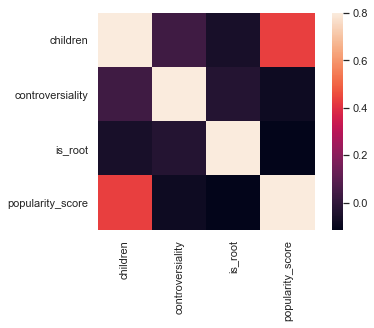

In [129]:
corrmat = train.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

In [436]:
# Xtr, ytr, Xval, yval, Xtest, ytest = load_data('test')
# sentiments = pd.DataFrame(data=Xtr)
# # sentiments.columns = ['children'] + ['text' + str(i) for i in range(10)] + ['len_text', 'len_sentence', 'sentiment_neg', 'sentiment_neu', 'sentiment_pos',
# #                    'sentiment_compound']
# sentiments['popularity'] = ytr
# fig, ax = plt.subplots(figsize=(10,10)) 
# corrmat_sent = sentiments.corr()
# sns.heatmap(corrmat_sent, vmax=.8, square=True)
# corrmat_sent.sort_values(["popularity"], ascending = False, inplace = True)
# print(corrmat_sent.popularity[:10])
# print(sentiments.head(3))
# plt.plot(sentiments['popularity'], sentiments[6])

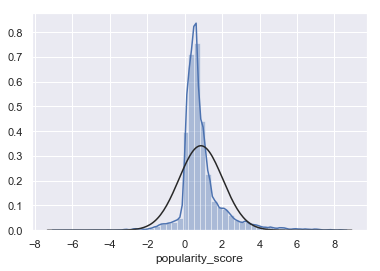

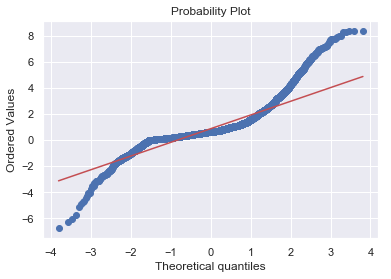

In [438]:
from scipy import stats
sns.distplot(train['popularity_score'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['popularity_score'], plot=plt)

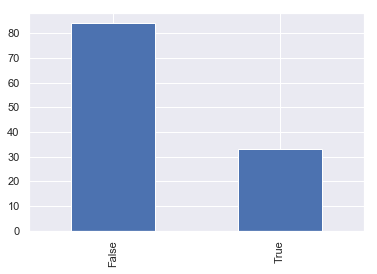

In [133]:
idx = np.argsort(train['controversiality'].values)
x = train[train['controversiality']>0]
x['is_root'].value_counts().plot.bar()

/Users/cuent/anaconda/envs/comp551/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


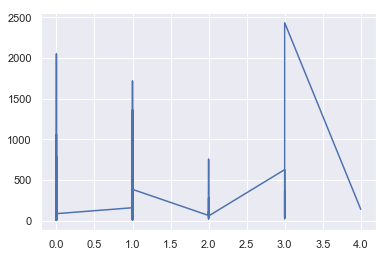

In [134]:
x['len'] = x['text'].apply(len)
idx = np.argsort(x['children'])
plt.plot(x['children'].iloc[idx].values, x['len'].iloc[idx].values)

Most comments have no children. So, it might be a correlation between the number of children and popularity. 

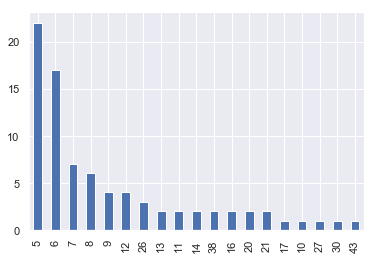

In [135]:
train['children'][train['children']>4].value_counts().plot.bar()

**Yes, there is a correlation.** Most comments with more than 10 replies are quite popular.

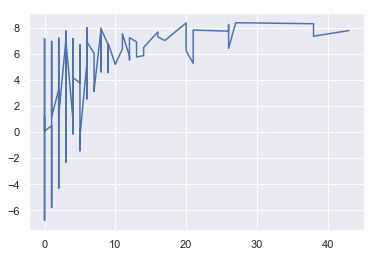

In [136]:
x = train['children']
o = np.argsort(x)
plt.plot(x[o], train['popularity_score'][o], '-')

We are using only 160 words. We are not using many words, so using stop words or some other preprocessig might be crucial. 

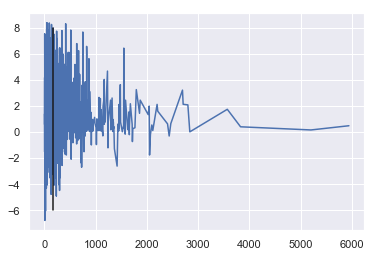

In [137]:
x = train['text'].apply(len)
o = np.argsort(x)
plt.plot(x[o], train['popularity_score'][o], '-')
plt.plot((160, 160), (-6, 8), 'k-')

In [138]:
train.iloc[o.tail(-1)].values # Those big comments might be outliers. 

array([[0, 0, False, 1.3643290175207412, '1'],
       [2, 0, False, 0.633265938808546, '?'],
       [0, 0, False, 0.03548075498233298, '😂'],
       ...,
       [0, 0, True, 0.39729354510739606,
        'Throwaway time\n\nFirst off I sell weed, it\'s how we became friends in the first place.\n \nWe were gonna start an LLC for a film company with a couple other friends. We both attended film school and I helped him with pre pro, production and a ton in post on his film. Then when it comes time to make the company he goes and does all the paper work secretly behind my back and invites the other friends we were making the company with to sign all the papers and purposely leave me out. \n\nOne of the other friends who signed it with him also owed me $450 for 2 ounces I fronted him so he could sell it, this agreement had been going on for a few months where I would front him and he would pay me back later once he had sold it.\n\nA few days later, still in the dark about why I was left out of

# Task 2

There are two modules for the implentation of linear regression. 
1. `linear_regression`: implementation for Linear regression closed-form and gradient descent.
2. `learning_rate`: implementation of different schedulers for learning rate such as constant, decay, momentum.

The following code shows an analysis of some toy data for which we know the exact weights. The purpose of this is to find the scheduler that converges faster. As the graph shows, decay converges with only 155 iterations, decay with 185. Conversely, a constant learning rate takes a lot of steps to converge. We should notice that we are using the default configurations of the implemented algorithms. Better results could be obtained with parameter tuning. However, the purpose of this is to check the implementation of the algorithms.

In [5]:
x = np.array([.86, .09, -.85, .87, -.44, -.43, -1.1, .40, -.96, .17])
y = np.array([2.49, .83, -.25, 3.1, .87, .02, -.12, 1.81, -.83, .43])

lse = clf.LinearRegressionMSE()
lse.fit(x, y)
exact = lse.w

In [6]:
lr = [LearningRate(),Decay(),Momentum()]
name = ['Constant', 'Decay', 'Momentum']
errors = []


for i, lr in enumerate(lr):
    regressor = clf.LinearRegressionGD(lr)
    regressor.fit(x, y)
    errors.append(regressor.errors)
    print("{} (steps={}, error={})".format(name[i], regressor.step, regressor.error))

Constant (steps=1000, error=1.0762032953252184e-05)
Decay (steps=991, error=9.976024454456696e-06)
Momentum (steps=716, error=9.971786946203189e-06)


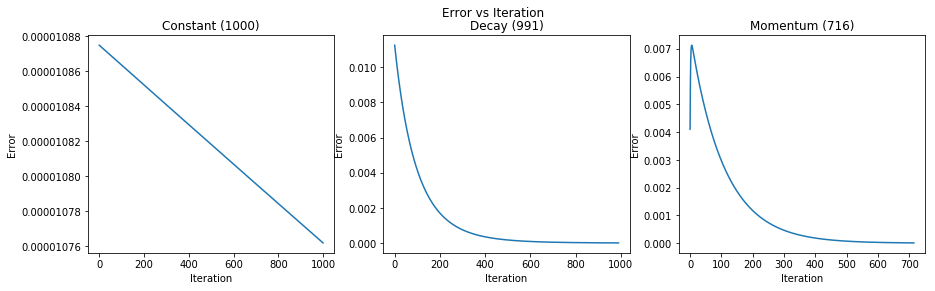

In [7]:
def plot_error(errors):    
    fig = plt.figure(figsize=(15,4))
    
    for i, error in enumerate(errors):
        plt.subplot(1, 3, i+1)
        
        it = list(range(len(error)))
        y = error
        plt.plot(it, y)
        plt.xlabel('Iteration')
        plt.ylabel('Error')
        plt.title(label=name[i] + " ({})".format( str(len(error))))
    plt.suptitle("Error vs Iteration")
plot_error(errors)

# Task 3

##### 3.1 Compare the runtime, stability, and performance of the closed-form linear regression and gradient descent approaches. For these experiments, it is fine to ignore the text features and only use the 3 simple features we provide. For gradient descent make sure you try out different learning rates and initializations! (And note that the learning rate might need to be very small...
##### 3.2 Using either the closed-form approach or gradient descent, compare a model with no text features, a model that uses only the top-60 words, and a model that uses the full 160 word occurrence features. Are any of these models underfitting or overfitting?
##### 3.3 Using either the closed-form approach or gradient descent, demonstrate the the two new features you proposed improve performance on the validation set.
##### 3.4 Run your best-performing model on the test set


1. runtime: table of time/iterations
2. stability: singular matrix / Cross validation 
3. performance: TODO: _train on test set / validation_


### Default hyperparameters

In [3]:
init = [True]#, False]
learning_rates = [10e-3, 1e-3, 5e-4,10e-5, 10e-7, 10e-8]
momentum = [.7, 0.8, 0.9, 0.999]
decay = [10e-2, 10e-3, 1e-4, 5e-4]

### Models
#### Model 1
Training with features: 
1. is_root
2. controversiality
3. children

In [4]:
data_model_1 = 'default_notext'
best_model_1, results_model_1 = model.train_model(data_model_1, init, learning_rates, momentum, decay)

Closed-form mse:1.0846830709157251 - mse_val:1.0203266848431447 (time=0.041586875915527344)
Gradient Descent mse:1.0934975423356417 - mse_val:1.0301696191446195 (init=True,iterations=1000,time=0.13225913047790527,Constant(lr=0.01))
Gradient Descent mse:1.180372493461703 - mse_val:1.1253853000976612 (init=True,iterations=1000,time=0.18026304244995117,Decay(lr=0.01,b=0.1))
Gradient Descent mse:1.1066421352660472 - mse_val:1.0457829462387886 (init=True,iterations=1000,time=0.19382405281066895,Decay(lr=0.01,b=0.01))
Gradient Descent mse:1.0937007100021383 - mse_val:1.0303812198150757 (init=True,iterations=1000,time=0.22147583961486816,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.0943814870119482 - mse_val:1.0311238259622173 (init=True,iterations=1000,time=0.1416621208190918,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.0934993460727669 - mse_val:1.0301700472597155 (init=True,iterations=1000,time=0.23280000686645508,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.0934996041206764 - mse

#### Model 2
Training with features: 
1. is_root
2. controversiality
3. children
4. text: top 60

In [504]:
data_model_2 = 'default_top60'
best_model_2, results_model_2 = model.train_model(data_model_2, init, learning_rates, momentum, decay)

Closed-form mse:1.060229826117505 - mse_val:0.9831859696254968 (time=0.0022211074829101562)
Gradient Descent mse:1.0700553584426047 - mse_val:0.9982215004376367 (init=True,iterations=1000,time=0.9736959934234619,Constant(lr=0.01))
Gradient Descent mse:1.186394496357353 - mse_val:1.1338342141586109 (init=True,iterations=1000,time=0.9013102054595947,Decay(lr=0.01,b=0.1))
Gradient Descent mse:1.0923547290356752 - mse_val:1.0279730661432505 (init=True,iterations=1000,time=0.8670868873596191,Decay(lr=0.01,b=0.01))
Gradient Descent mse:1.0704078171029048 - mse_val:0.9987389814863659 (init=True,iterations=1000,time=0.7458078861236572,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.0716837258550627 - mse_val:1.0006136398699577 (init=True,iterations=1000,time=0.772719144821167,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.0700563727294825 - mse_val:0.9982208827945661 (init=True,iterations=1000,time=0.8275730609893799,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.0700565178840766 - mse_val:0

Gradient Descent mse:1.109061625666905 - mse_val:1.021902028303069 (init=False,iterations=1000,time=1.0416619777679443,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.1632123204530316 - mse_val:1.1118200313891853 (init=False,iterations=1000,time=0.9777848720550537,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.1001910197411076 - mse_val:1.0237494361288946 (init=False,iterations=1000,time=0.8815701007843018,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.1071696555384554 - mse_val:1.0348133896754803 (init=False,iterations=1000,time=0.8948791027069092,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:1.099900919430031 - mse_val:1.0258367822324774 (init=False,iterations=1000,time=0.9137430191040039,Momentum(lr=0.01,b=0.9))
Gradient Descent mse:1.101830216304316 - mse_val:1.0319162252029566 (init=False,iterations=1000,time=0.8660740852355957,Momentum(lr=0.01,b=0.999))
Gradient Descent mse:2.2519552630951063 - mse_val:2.6153686982485858 (init=False,iterations=1000,time=0.9869117736816406,Const

#### Model 3
Training with features: 
1. is_root
2. controversiality
3. children
4. text: top 160

In [505]:
data_model_3 = 'default_top160'
best_model_3, results_model_3 = model.train_model(data_model_3, init, learning_rates, momentum, decay)

Closed-form mse:1.0468329117783814 - mse_val:0.9895357003238057 (time=0.029340028762817383)
Gradient Descent mse:1.0607275488309842 - mse_val:0.9928966146307043 (init=True,iterations=1000,time=3.8776051998138428,Constant(lr=0.01))
Gradient Descent mse:1.18458547275162 - mse_val:1.131668754335487 (init=True,iterations=1000,time=4.000108957290649,Decay(lr=0.01,b=0.1))
Gradient Descent mse:1.088200195954605 - mse_val:1.0235825884059975 (init=True,iterations=1000,time=3.721389055252075,Decay(lr=0.01,b=0.01))
Gradient Descent mse:1.0612764175354388 - mse_val:0.9933249722775704 (init=True,iterations=1000,time=3.6959540843963623,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.0632223159186367 - mse_val:0.9949990101022299 (init=True,iterations=1000,time=3.7019500732421875,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.0607296813995588 - mse_val:0.9928932485577997 (init=True,iterations=1000,time=3.6897919178009033,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.0607299863028914 - mse_val:0.992

Gradient Descent mse:1.3552638362861287 - mse_val:1.4095283712497226 (init=False,iterations=1000,time=3.883441209793091,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.5351648838315772 - mse_val:1.5223697156188172 (init=False,iterations=1000,time=4.095347881317139,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.2826684538964521 - mse_val:1.2556667657336198 (init=False,iterations=1000,time=3.7665398120880127,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.2792390614138134 - mse_val:1.2176422106386973 (init=False,iterations=1000,time=3.98148512840271,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:1.2837743008677147 - mse_val:1.2233236003803267 (init=False,iterations=1000,time=4.308222770690918,Momentum(lr=0.01,b=0.9))
Gradient Descent mse:1.2774875036883961 - mse_val:1.3015961470631783 (init=False,iterations=1000,time=5.627488136291504,Momentum(lr=0.01,b=0.999))
Gradient Descent mse:3.095983302421929 - mse_val:3.1507323770905304 (init=False,iterations=1000,time=4.72274374961853,Constant(l

#### Model 4
Training with features: 
1. children
2. $children^2$
3. text: top 160

In [6]:
data_model_4 = 'square'
best_model_4, results_model_4 = model.train_model(data_model_4, init, learning_rates, momentum, decay)

Closed-form mse:1.024183574859494 - mse_val:1.000776824818799 (time=0.01339578628540039)
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=226,time=0.9615471363067627,Constant(lr=0.01))
Gradient Descent mse:4.770324308194477e+64 - mse_val:5.0597778391098677e+64 (init=True,iterations=1000,time=4.034344911575317,Decay(lr=0.01,b=0.1))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=330,time=1.2455501556396484,Decay(lr=0.01,b=0.01))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=227,time=0.8823559284210205,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=231,time=0.8944571018218994,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=267,time=1.0577268600463867,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=277,time=1.0862457752227783,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=289,time=1.154401063919067

/Users/cuent/Desktop/assignment1/metric.py:5: RuntimeWarning: overflow encountered in square
  return np.square(y - y_pred).mean()


Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1000,time=3.8073019981384277,Decay(lr=0.01,b=0.01))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=228,time=0.9505429267883301,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=238,time=1.0062432289123535,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=1,time=0.00907278060913086,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=1,time=0.008018970489501953,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=1,time=0.009400129318237305,Momentum(lr=0.01,b=0.9))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=1,time=0.008204936981201172,Momentum(lr=0.01,b=0.999))
Gradient Descent mse:1.4644851022067618e+247 - mse_val:1.1136210540911849e+247 (init=False,iterations=1000,time=3.8361239433288574,Constant(lr=0.001))
Gradient Descent mse:151.00922442034545 - ms

#### Model 5
Training with features: 
1. children
3. text: top 160

Closed-form mse:1.0713771195391049 - mse_val:1.024129073120601 (time=0.009061813354492188)
Gradient Descent mse:1.077171013628345 - mse_val:1.0151910182041461 (init=True,iterations=1000,time=3.9154160022735596,Constant(lr=0.01))
Gradient Descent mse:1.1843220389088571 - mse_val:1.1305039643027144 (init=True,iterations=1000,time=4.049867868423462,Decay(lr=0.01,b=0.1))
Gradient Descent mse:1.0910122726468803 - mse_val:1.0260471702069318 (init=True,iterations=1000,time=3.4984169006347656,Decay(lr=0.01,b=0.01))
Gradient Descent mse:1.0775358011223255 - mse_val:1.0152850666496296 (init=True,iterations=1000,time=3.5172059535980225,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.0788431771509082 - mse_val:1.015761802732717 (init=True,iterations=1000,time=4.232439041137695,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.0771718222638618 - mse_val:1.015188503964189 (init=True,iterations=1000,time=4.073310136795044,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.0771719376299127 - mse_val:1.0151

Gradient Descent mse:1.3652383323453814 - mse_val:1.3767555946454824 (init=False,iterations=1000,time=3.9464519023895264,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.5440923542250726 - mse_val:1.5900872866807572 (init=False,iterations=1000,time=3.8749382495880127,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.3287430535296434 - mse_val:1.328824557263944 (init=False,iterations=1000,time=4.296778917312622,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.2819739335376092 - mse_val:1.2295242648384432 (init=False,iterations=1000,time=4.381212949752808,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:1.2580234243199306 - mse_val:1.2553222396361035 (init=False,iterations=1000,time=4.054959058761597,Momentum(lr=0.01,b=0.9))
Gradient Descent mse:1.2850327127658285 - mse_val:1.2537944272799744 (init=False,iterations=1000,time=4.049225091934204,Momentum(lr=0.01,b=0.999))
Gradient Descent mse:2.9217148067381955 - mse_val:3.3499665658174957 (init=False,iterations=1000,time=4.376513957977295,Constan

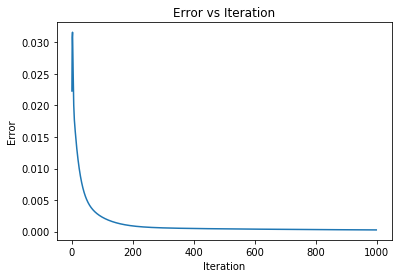

In [7]:
data_model_5 = 'only_children_text'
best_model_5, results_model_5 = model.train_model(data_model_5, init, learning_rates, momentum, decay)

#### Model 6
Training with features: 
1. is_root
2. children
3. text: top 160

Closed-form mse:1.0595842691797983 - mse_val:1.0038257316514585 (time=0.01015329360961914)
Gradient Descent mse:1.065272942771588 - mse_val:0.9972676146386087 (init=True,iterations=1000,time=4.20185399055481,Constant(lr=0.01))
Gradient Descent mse:1.1847260267464854 - mse_val:1.1317845316513535 (init=True,iterations=1000,time=3.993795871734619,Decay(lr=0.01,b=0.1))
Gradient Descent mse:1.0893380172127043 - mse_val:1.0245937341365474 (init=True,iterations=1000,time=4.007766962051392,Decay(lr=0.01,b=0.01))
Gradient Descent mse:1.065644436675072 - mse_val:0.9975138146412788 (init=True,iterations=1000,time=4.734307050704956,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.067027859573962 - mse_val:0.9986148028925637 (init=True,iterations=1000,time=4.099797964096069,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.0652730784096356 - mse_val:0.9972623085264145 (init=True,iterations=1000,time=5.38575005531311,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.0652730979816367 - mse_val:0.997261550

Gradient Descent mse:1.3059831419995205 - mse_val:1.2585857865821972 (init=False,iterations=1000,time=3.889836072921753,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.4640424361762705 - mse_val:1.6069896433517699 (init=False,iterations=1000,time=3.8447611331939697,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.2553959785297022 - mse_val:1.259127059070042 (init=False,iterations=1000,time=3.7239773273468018,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.2941947220824237 - mse_val:1.2322458271475816 (init=False,iterations=1000,time=3.862819194793701,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:1.3192591368625486 - mse_val:1.2768437256769485 (init=False,iterations=1000,time=3.945578098297119,Momentum(lr=0.01,b=0.9))
Gradient Descent mse:1.250473329482729 - mse_val:1.2680044418475778 (init=False,iterations=1000,time=4.293344020843506,Momentum(lr=0.01,b=0.999))
Gradient Descent mse:3.0562170678852287 - mse_val:3.2665499933793525 (init=False,iterations=1000,time=4.789730787277222,Constant

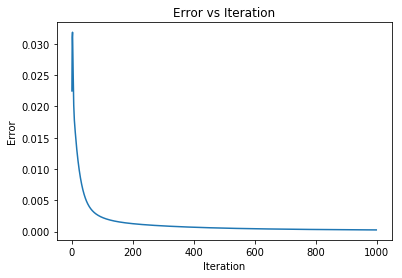

In [8]:
data_model_6 = 'default_noroot'
best_model_6, results_model_6 = model.train_model(data_model_6, init, learning_rates, momentum, decay)

#### Model 7
Training with features: 
1. is_root
2. controversality
3. children
3. text: tfidf, top160

Ignoring closed-form bc of singular matrix
Gradient Descent mse:1.0677505332682582 - mse_val:1.0015010947424563 (init=True,iterations=1000,time=3.3944528102874756,Constant(lr=0.01))
Gradient Descent mse:1.1847381614629071 - mse_val:1.1313736013798874 (init=True,iterations=1000,time=3.5348422527313232,Decay(lr=0.01,b=0.1))
Gradient Descent mse:1.0901193975645804 - mse_val:1.0255730178069788 (init=True,iterations=1000,time=3.346871852874756,Decay(lr=0.01,b=0.01))
Gradient Descent mse:1.0681796626410995 - mse_val:1.0017413751031075 (init=True,iterations=1000,time=3.4539027214050293,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.0696626736798514 - mse_val:1.002729822857951 (init=True,iterations=1000,time=3.687213182449341,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.067753150412245 - mse_val:1.001497938817687 (init=True,iterations=1000,time=3.70452618598938,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.067753524695228 - mse_val:1.0014974882207568 (init=True,iterations=1000,time=4.754

Gradient Descent mse:1.3148788304111352 - mse_val:1.31464957535333 (init=False,iterations=1000,time=4.048419237136841,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.4134426811696235 - mse_val:1.3608968640886332 (init=False,iterations=1000,time=3.949573040008545,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.2776834478287864 - mse_val:1.174775389150292 (init=False,iterations=1000,time=3.614591121673584,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.2487436875009443 - mse_val:1.176260729350472 (init=False,iterations=1000,time=3.620922088623047,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:1.254705169232294 - mse_val:1.192466708692672 (init=False,iterations=1000,time=3.6538689136505127,Momentum(lr=0.01,b=0.9))
Gradient Descent mse:1.288383518883225 - mse_val:1.2437212834825024 (init=False,iterations=1000,time=4.903501033782959,Momentum(lr=0.01,b=0.999))
Gradient Descent mse:2.5182570055071336 - mse_val:2.932030005569591 (init=False,iterations=1000,time=3.506354808807373,Constant(lr=0.0

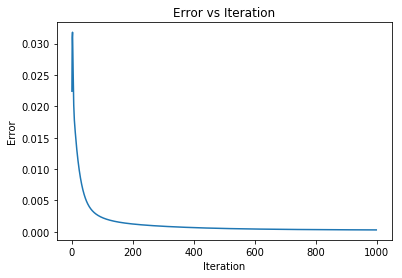

In [9]:
data_model_7 = 'default_tfidf'
best_model_7, results_model_7 = model.train_model(data_model_7, init, learning_rates, momentum, decay)

#### Model 8
Training with features: 
1. is_root
2. controversality
3. children
3. text: feelings, top 160

Ignoring closed-form bc of singular matrix
Gradient Descent mse:1.0909380614984907 - mse_val:1.0296535873813164 (init=True,iterations=1000,time=0.9223220348358154,Constant(lr=0.01))
Gradient Descent mse:1.175467497818264 - mse_val:1.1218871033999291 (init=True,iterations=1000,time=0.8848719596862793,Decay(lr=0.01,b=0.1))
Gradient Descent mse:1.1045897769667206 - mse_val:1.045913292555919 (init=True,iterations=1000,time=0.9049391746520996,Decay(lr=0.01,b=0.01))
Gradient Descent mse:1.091175205594877 - mse_val:1.0298925748666443 (init=True,iterations=1000,time=0.8582842350006104,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.091966367435564 - mse_val:1.0307386365428883 (init=True,iterations=1000,time=0.8576681613922119,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.0909401873157865 - mse_val:1.0296535728269913 (init=True,iterations=1000,time=0.8673210144042969,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.0909404913641942 - mse_val:1.0296535711039636 (init=True,iterations=1000,time=0

Gradient Descent mse:1.1063894535452836 - mse_val:1.0305732703020767 (init=False,iterations=1000,time=0.9309930801391602,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.1389115321255225 - mse_val:1.0611066671642793 (init=False,iterations=1000,time=1.0020620822906494,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.1098955563003474 - mse_val:1.0229021372887936 (init=False,iterations=1000,time=1.3355748653411865,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.121189994289966 - mse_val:1.031301403714055 (init=False,iterations=1000,time=1.5648550987243652,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:1.1133000658824739 - mse_val:1.0299122437838955 (init=False,iterations=1000,time=1.264314889907837,Momentum(lr=0.01,b=0.9))
Gradient Descent mse:1.125740616097682 - mse_val:1.0523626327404636 (init=False,iterations=1000,time=1.200911283493042,Momentum(lr=0.01,b=0.999))
Gradient Descent mse:1.2747094578193203 - mse_val:1.204269477512471 (init=False,iterations=1000,time=1.1647148132324219,Constan

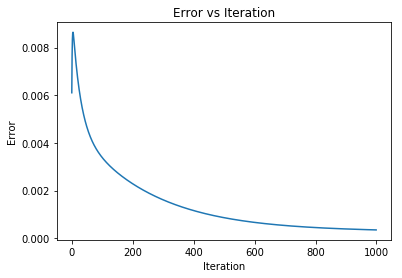

In [10]:
data_model_8 = 'default_feeling'
best_model_8, results_model_8 = model.train_model(data_model_8, init, learning_rates, momentum, decay)

#### Model 9
Training with features: 
3. children

Closed-form mse:1.1099922875050707 - mse_val:1.0488298832681369 (time=0.0006301403045654297)
Gradient Descent mse:1.109992565128062 - mse_val:1.0488429901087153 (init=True,iterations=398,time=0.07551002502441406,Constant(lr=0.01))
Gradient Descent mse:1.1780866403203742 - mse_val:1.1207534544813074 (init=True,iterations=1000,time=0.1919999122619629,Decay(lr=0.01,b=0.1))
Gradient Descent mse:1.1100608438455675 - mse_val:1.049099887468994 (init=True,iterations=1000,time=0.19002223014831543,Decay(lr=0.01,b=0.01))
Gradient Descent mse:1.1099925852762529 - mse_val:1.0488434676598652 (init=True,iterations=404,time=0.07631206512451172,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.1099926982895978 - mse_val:1.0488458997729808 (init=True,iterations=427,time=0.08030200004577637,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.1099925629098448 - mse_val:1.0488429366610326 (init=True,iterations=394,time=0.07707381248474121,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.1099925571421387 - mse_val

Gradient Descent mse:1.1099926115790502 - mse_val:1.0488440696150372 (init=False,iterations=403,time=0.08045196533203125,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.1099928990352146 - mse_val:1.0488495374404927 (init=False,iterations=511,time=0.09462499618530273,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.1099925623359779 - mse_val:1.0488429241956354 (init=False,iterations=357,time=0.06480789184570312,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.1099925586177746 - mse_val:1.0488428325996753 (init=False,iterations=403,time=0.07311201095581055,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:1.1099925521773564 - mse_val:1.0488180877123243 (init=False,iterations=230,time=0.04240918159484863,Momentum(lr=0.01,b=0.9))
Gradient Descent mse:1.1099925544368956 - mse_val:1.0488175741444608 (init=False,iterations=334,time=0.06063389778137207,Momentum(lr=0.01,b=0.999))
Gradient Descent mse:1.1200943107008958 - mse_val:1.0614796650998573 (init=False,iterations=1000,time=0.17545604705810547,

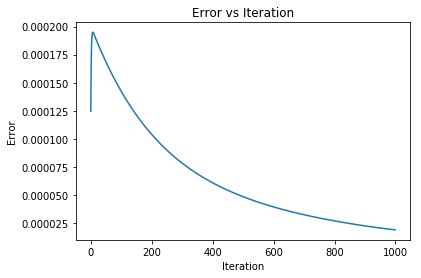

In [11]:
data_model_9 = 'only_children'
best_model_9, results_model_9 = model.train_model(data_model_9, init, learning_rates, momentum, decay)

#### Model 10
Training with features: 
3. children
3. $children^2$

Closed-form mse:1.0607855201870686 - mse_val:1.0302247097972375 (time=0.0008990764617919922)
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=226,time=0.0467071533203125,Constant(lr=0.01))


/Users/cuent/Desktop/assignment1/linear_regression.py:76: RuntimeWarning: overflow encountered in multiply
  dw = 2 * (X.T.dot(X).dot(self.w) - X.T.dot(y))


Gradient Descent mse:5.351929327046942e+64 - mse_val:5.629077429986799e+64 (init=True,iterations=1000,time=0.2042849063873291,Decay(lr=0.01,b=0.1))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=330,time=0.0688779354095459,Decay(lr=0.01,b=0.01))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=227,time=0.04840397834777832,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=231,time=0.047875165939331055,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=267,time=0.058074951171875,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=277,time=0.0594789981842041,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=289,time=0.06322216987609863,Momentum(lr=0.01,b=0.9))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=303,time=0.06894803047180176,Momentum(lr=0.01,b=0.999))
Gradient Descent mse:1.4704701077913617e+243 - mse

Gradient Descent mse:1.4179322923537678e+247 - mse_val:1.0780575061244612e+247 (init=False,iterations=1000,time=0.22870182991027832,Constant(lr=0.001))
Gradient Descent mse:1.1336393944204055 - mse_val:1.1098588086426247 (init=False,iterations=335,time=0.080078125,Decay(lr=0.001,b=0.1))
Gradient Descent mse:1.0921667455784092 - mse_val:1.0739204701681766 (init=False,iterations=1000,time=0.28327488899230957,Decay(lr=0.001,b=0.01))
Gradient Descent mse:9.160655897249051e+20 - mse_val:6.964869834982723e+20 (init=False,iterations=1000,time=0.256986141204834,Decay(lr=0.001,b=0.0001))
Gradient Descent mse:1.0754686573863546 - mse_val:1.0450828440532374 (init=False,iterations=1000,time=0.22535920143127441,Decay(lr=0.001,b=0.0005))
Gradient Descent mse:1.0657486386810187 - mse_val:1.0321407156198201 (init=False,iterations=1000,time=0.21576309204101562,Momentum(lr=0.001,b=0.7))
Gradient Descent mse:1.0625746186407232 - mse_val:1.0323824955953544 (init=False,iterations=1000,time=0.21057391166687

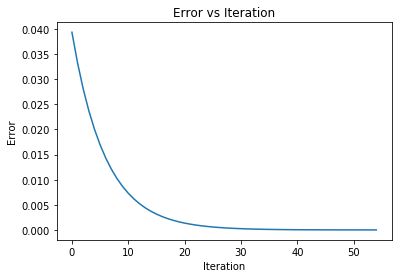

In [12]:
data_model_10 = 'only_children_square'
best_model_10, results_model_10 = model.train_model(data_model_10, init, learning_rates, momentum, decay)

#### Model 11
Training with features: 
3. children
3. $children^2$
3. $children^3$

In [13]:
data_model_11 = 'only_cube'
best_model_11, results_model_11 = model.train_model(data_model_11, init, learning_rates, momentum, decay)

Closed-form mse:1.060598405150038 - mse_val:1.0308730352748043 (time=0.000476837158203125)
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=69,time=0.013731241226196289,Constant(lr=0.01))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=80,time=0.010547876358032227,Decay(lr=0.01,b=0.1))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=71,time=0.009134292602539062,Decay(lr=0.01,b=0.01))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=69,time=0.008980989456176758,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=69,time=0.011119842529296875,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=72,time=0.01007986068725586,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=72,time=0.010540962219238281,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=73,time=0.00972294807434082,Momentum(lr=0.01,b=0.9))
Gr

Gradient Descent mse:nan - mse_val:nan (init=False,iterations=96,time=0.01323390007019043,Decay(lr=0.0005,b=0.0001))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=97,time=0.012593269348144531,Decay(lr=0.0005,b=0.0005))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=1,time=0.0004668235778808594,Momentum(lr=0.0005,b=0.7))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=1,time=0.0003483295440673828,Momentum(lr=0.0005,b=0.8))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=1,time=0.0005528926849365234,Momentum(lr=0.0005,b=0.9))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=1,time=0.00044798851013183594,Momentum(lr=0.0005,b=0.999))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=123,time=0.01539301872253418,Constant(lr=0.0001))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=362,time=0.047477006912231445,Decay(lr=0.0001,b=0.1))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=

#### Model 12
Training with features: 
3. children
3. $children^2$
3. $children^3$
3. $children^4$

In [14]:
data_model_12 = 'only_fourth'
best_model_12, results_model_12 = model.train_model(data_model_12, init, learning_rates, momentum, decay)

Closed-form mse:1.055919367962343 - mse_val:1.0347374499986521 (time=0.00048828125)
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=41,time=0.009683847427368164,Constant(lr=0.01))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=43,time=0.011998891830444336,Decay(lr=0.01,b=0.1))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=41,time=0.00991511344909668,Decay(lr=0.01,b=0.01))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=41,time=0.009636878967285156,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=41,time=0.009582042694091797,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=42,time=0.00970315933227539,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=42,time=0.009865999221801758,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=42,time=0.010230064392089844,Momentum(lr=0.01,b=0.9))
Gradient 

Gradient Descent mse:nan - mse_val:nan (init=False,iterations=50,time=0.012272834777832031,Decay(lr=0.0005,b=0.01))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=48,time=0.01088404655456543,Decay(lr=0.0005,b=0.0001))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=48,time=0.011631965637207031,Decay(lr=0.0005,b=0.0005))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=1,time=0.0005550384521484375,Momentum(lr=0.0005,b=0.7))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=1,time=0.0004980564117431641,Momentum(lr=0.0005,b=0.8))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=1,time=0.0005238056182861328,Momentum(lr=0.0005,b=0.9))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=1,time=0.0004987716674804688,Momentum(lr=0.0005,b=0.999))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=54,time=0.012138128280639648,Constant(lr=0.0001))
Gradient Descent mse:nan - mse_val:nan (init=False,iterations=6

##### $children^3$ vs $children^4$

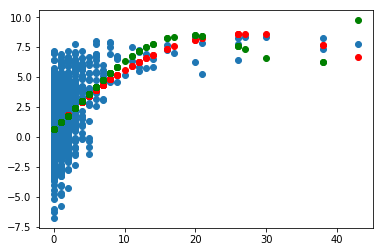

In [17]:
X_train, y_train, X_val, y_val, X_test, y_test = load_data('only_cube')
plt.plot(X_train[:, 0], y_train, 'o')
f = lambda x1, x2, x3: best_model_11.w[0] * x1 + best_model_11.w[1] * x2 + best_model_11.w[2] * x3 + best_model_11.w[3]
plt.plot(X_train[:, 0], f(X_train[:, 0], X_train[:, 1], X_train[:, 2]), 'ro')

X_train, y_train, X_val, y_val, X_test, y_test = load_data('only_fourth')
f = lambda x1, x2, x3, x4: best_model_12.w[0] * x1 + best_model_12.w[1] * x2 + best_model_12.w[2]*x3+ best_model_12.w[3]*x4 + best_model_12.w[4]
plt.plot(X_train[:, 0], f(X_train[:, 0], X_train[:, 1], X_train[:, 2], X_train[:, 3]), 'go')

#### Model 13
Training with features: 
3. children
3. text: stop words, top 120

Closed-form mse:5.859995323349346e+45 - mse_val:4.6142793083095046e+45 (time=0.0061070919036865234)
Gradient Descent mse:1.095745696680856 - mse_val:1.0433464688585792 (init=True,iterations=1000,time=2.1354498863220215,Constant(lr=0.01))
Gradient Descent mse:1.172459640709365 - mse_val:1.1138879058474163 (init=True,iterations=1000,time=2.201953172683716,Decay(lr=0.01,b=0.1))
Gradient Descent mse:1.1034721797019995 - mse_val:1.0438306229280727 (init=True,iterations=1000,time=2.1916816234588623,Decay(lr=0.01,b=0.01))
Gradient Descent mse:1.096049382219866 - mse_val:1.0432830690552632 (init=True,iterations=1000,time=2.2124006748199463,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.0970520050750396 - mse_val:1.043116521712919 (init=True,iterations=1000,time=2.1898701190948486,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.0957482161116774 - mse_val:1.0433460567369937 (init=True,iterations=1000,time=2.429081916809082,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.0957485760845953 - mse_v

Gradient Descent mse:1.3021869755423268 - mse_val:1.2587495975207963 (init=False,iterations=1000,time=2.802623987197876,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.4335204263284447 - mse_val:1.457761122672714 (init=False,iterations=1000,time=2.6787571907043457,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.265230482460634 - mse_val:1.2443419511931348 (init=False,iterations=1000,time=2.3812029361724854,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.291681073779684 - mse_val:1.2576349741836856 (init=False,iterations=1000,time=2.8462448120117188,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:1.2693616567093626 - mse_val:1.2211177780466391 (init=False,iterations=1000,time=2.820423126220703,Momentum(lr=0.01,b=0.9))
Gradient Descent mse:1.25793961775273 - mse_val:1.1422132403368819 (init=False,iterations=1000,time=2.487078905105591,Momentum(lr=0.01,b=0.999))
Gradient Descent mse:2.8264938088857097 - mse_val:2.8091575958901087 (init=False,iterations=1000,time=2.6443839073181152,Constant(

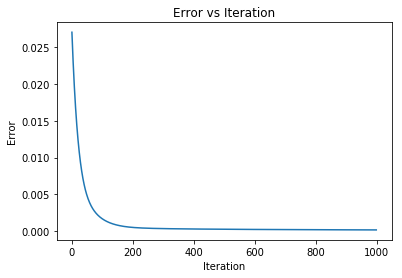

In [18]:
data_model_13 = 'stopwords_children_120'
best_model_13, results_model_13 = model.train_model(data_model_13, init, learning_rates, momentum, decay)

#### Model 14
Training with features: 
3. children
3. text: stopwords, top 50

Closed-form mse:2.0332865637741818e+33 - mse_val:9.822096770931242e+32 (time=0.0025620460510253906)
Gradient Descent mse:1.100611553452846 - mse_val:1.043027430304691 (init=True,iterations=1000,time=0.6341240406036377,Constant(lr=0.01))
Gradient Descent mse:1.1739376571369642 - mse_val:1.115420252504414 (init=True,iterations=1000,time=0.6414060592651367,Decay(lr=0.01,b=0.1))
Gradient Descent mse:1.1053395029494815 - mse_val:1.0445790048891368 (init=True,iterations=1000,time=0.7353432178497314,Decay(lr=0.01,b=0.01))
Gradient Descent mse:1.1007680939880558 - mse_val:1.0430400050655289 (init=True,iterations=1000,time=0.7414219379425049,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.1013005254564199 - mse_val:1.0430980732242006 (init=True,iterations=1000,time=0.7736189365386963,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.100612491487177 - mse_val:1.0430276714863527 (init=True,iterations=1000,time=0.6759800910949707,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.1006126255115118 - mse

Gradient Descent mse:1.184576780497491 - mse_val:1.1583807549947716 (init=False,iterations=1000,time=1.478402853012085,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:1.2598023396039422 - mse_val:1.21780244964596 (init=False,iterations=1000,time=1.0125160217285156,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:1.1902429576882811 - mse_val:1.1264676599840233 (init=False,iterations=1000,time=0.8404099941253662,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:1.1699460284013647 - mse_val:1.1083017710643108 (init=False,iterations=1000,time=0.6320052146911621,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:1.172026824177919 - mse_val:1.0958028858687314 (init=False,iterations=1000,time=0.6891779899597168,Momentum(lr=0.01,b=0.9))
Gradient Descent mse:1.168976347413466 - mse_val:1.0887842615368948 (init=False,iterations=1000,time=0.8299779891967773,Momentum(lr=0.01,b=0.999))
Gradient Descent mse:1.78298043298368 - mse_val:1.8049849474892339 (init=False,iterations=1000,time=0.728090763092041,Constant(l

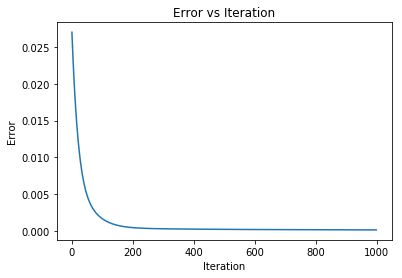

In [19]:
data_model_14 = 'stopwords_children_50'
best_model_14, results_model_14 = model.train_model(data_model_14, init, learning_rates, momentum, decay)

#### Model 15
Training with features: 
3. children
3. text: stopwords, top 50
3. len text

Closed-form mse:1.565840110257956e+33 - mse_val:1.4398152982424782e+33 (time=0.007886886596679688)
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=97,time=0.13180804252624512,Constant(lr=0.01))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=130,time=0.10540294647216797,Decay(lr=0.01,b=0.1))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=103,time=0.09191203117370605,Decay(lr=0.01,b=0.01))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=97,time=0.07188701629638672,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=98,time=0.09472107887268066,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=103,time=0.08363008499145508,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=105,time=0.07912874221801758,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=106,time=0.10660195350646973,Momentum(lr=0.01,b=0

/Users/cuent/Desktop/assignment1/metric.py:5: RuntimeWarning: overflow encountered in square
  return np.square(y - y_pred).mean()


Gradient Descent mse:inf - mse_val:inf (init=True,iterations=1000,time=0.662255048751831,Decay(lr=0.0005,b=0.1))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=195,time=0.127640962600708,Decay(lr=0.0005,b=0.01))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=166,time=0.13578510284423828,Decay(lr=0.0005,b=0.0001))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=167,time=0.1857588291168213,Decay(lr=0.0005,b=0.0005))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=185,time=0.20011281967163086,Momentum(lr=0.0005,b=0.7))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=189,time=0.20044589042663574,Momentum(lr=0.0005,b=0.8))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=194,time=0.20483708381652832,Momentum(lr=0.0005,b=0.9))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=199,time=0.21084976196289062,Momentum(lr=0.0005,b=0.999))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=272,time=0

Gradient Descent mse:inf - mse_val:inf (init=False,iterations=293,time=0.20128202438354492,Decay(lr=0.0001,b=0.0005))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.001402139663696289,Momentum(lr=0.0001,b=0.7))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.0013871192932128906,Momentum(lr=0.0001,b=0.8))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.001336812973022461,Momentum(lr=0.0001,b=0.9))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.0013217926025390625,Momentum(lr=0.0001,b=0.999))
Gradient Descent mse:2.3248971802575107 - mse_val:2.409557467710854 (init=False,iterations=64,time=0.042379140853881836,Constant(lr=1e-06))
Gradient Descent mse:2.8368975089920623 - mse_val:2.7676176763209277 (init=False,iterations=432,time=0.28362488746643066,Decay(lr=1e-06,b=0.1))
Gradient Descent mse:2.2022994299729404 - mse_val:2.2939994901959655 (init=False,iterations=91,time=0.06085395812988281,Decay(

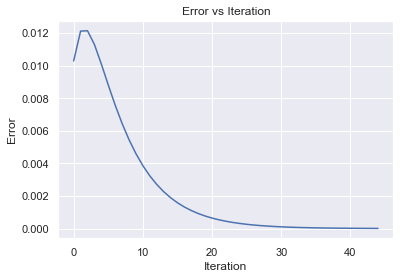

In [145]:
data_model_15 = 'stopwords_len_top50'
best_model_15, results_model_15 = model.train_model(data_model_15, init, learning_rates, momentum, decay)

#### Model 15
Training with features: 
3. children
3. text: top 50
3. len text

In [146]:
data_model_16 = 'len_top50'
best_model_16, results_model_16 = model.train_model(data_model_16, init, learning_rates, momentum, decay)

Closed-form mse:1.093953449296535 - mse_val:1.0326569560414962 (time=0.001901865005493164)
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=97,time=0.12052488327026367,Constant(lr=0.01))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=130,time=0.10960602760314941,Decay(lr=0.01,b=0.1))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=103,time=0.09383988380432129,Decay(lr=0.01,b=0.01))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=97,time=0.07022690773010254,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=98,time=0.09212803840637207,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=103,time=0.0785820484161377,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=105,time=0.08167099952697754,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=106,time=0.09076094627380371,Momentum(lr=0.01,b=0.9))
Grad

Gradient Descent mse:inf - mse_val:inf (init=False,iterations=142,time=0.09601593017578125,Decay(lr=0.001,b=0.0001))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=144,time=0.13302016258239746,Decay(lr=0.001,b=0.0005))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.0019469261169433594,Momentum(lr=0.001,b=0.7))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.0012929439544677734,Momentum(lr=0.001,b=0.8))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.0019888877868652344,Momentum(lr=0.001,b=0.9))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.0013270378112792969,Momentum(lr=0.001,b=0.999))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=164,time=0.14353108406066895,Constant(lr=0.0005))
Gradient Descent mse:7.998236016235295 - mse_val:9.444417524057881 (init=False,iterations=1000,time=0.7508049011230469,Decay(lr=0.0005,b=0.1))
Gradient Descent mse:inf - mse_val:inf (i

#### Model 17
Training with features: 
3. children
3. text: top 10
3. len text
3. len sentence
3. sentiment positive
3. sentiment neutral
3. sentiment negative
3. sentiment compound

In [350]:
data_model_17 = 'children_sentiment_top10'
best_model_17, results_model_17 = model.train_model(data_model_17, init, learning_rates, momentum, decay)

Closed-form mse:1.1044781338371397 - mse_val:1.0398723870241628 (time=0.000865936279296875)
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=97,time=0.033388614654541016,Constant(lr=0.01))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=130,time=0.05637693405151367,Decay(lr=0.01,b=0.1))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=103,time=0.0365147590637207,Decay(lr=0.01,b=0.01))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=97,time=0.025761842727661133,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=98,time=0.032697200775146484,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=103,time=0.039458274841308594,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=105,time=0.04239010810852051,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=106,time=0.032531023025512695,Momentum(lr=0.01,b=0.9)

Gradient Descent mse:inf - mse_val:inf (init=False,iterations=164,time=0.046891212463378906,Constant(lr=0.0005))
Gradient Descent mse:7.033054763237822 - mse_val:7.553804556456791 (init=False,iterations=1000,time=0.3069629669189453,Decay(lr=0.0005,b=0.1))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=250,time=0.0635530948638916,Decay(lr=0.0005,b=0.01))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=165,time=0.041899919509887695,Decay(lr=0.0005,b=0.0001))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=169,time=0.04345107078552246,Decay(lr=0.0005,b=0.0005))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.0007569789886474609,Momentum(lr=0.0005,b=0.7))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.000698089599609375,Momentum(lr=0.0005,b=0.8))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.0006489753723144531,Momentum(lr=0.0005,b=0.9))
Gradient Descent mse:inf - mse_val:inf 

#### Model 18
Training with features: 
3. children
3. len text
3. len sentence
3. sentiment positive
3. sentiment neutral
3. sentiment negative
3. sentiment compound

In [351]:
data_model_18 = 'children_sentiment'
best_model_18, results_model_18 = model.train_model(data_model_18, init, learning_rates, momentum, decay)

Closed-form mse:1.108803037108256 - mse_val:1.0442909437089314 (time=0.0008020401000976562)
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=97,time=0.018833160400390625,Constant(lr=0.01))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=130,time=0.02919316291809082,Decay(lr=0.01,b=0.1))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=103,time=0.02818894386291504,Decay(lr=0.01,b=0.01))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=97,time=0.02264690399169922,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=98,time=0.016976118087768555,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=103,time=0.017961978912353516,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=105,time=0.018849611282348633,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=106,time=0.020626068115234375,Momentum(lr=0.01,b=0.9

Gradient Descent mse:1.6800934643720633 - mse_val:1.5650133070504584 (init=False,iterations=597,time=0.10638189315795898,Decay(lr=0.0005,b=0.1))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=250,time=0.04339194297790527,Decay(lr=0.0005,b=0.01))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=165,time=0.026980161666870117,Decay(lr=0.0005,b=0.0001))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=170,time=0.028005123138427734,Decay(lr=0.0005,b=0.0005))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.00046181678771972656,Momentum(lr=0.0005,b=0.7))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.00040340423583984375,Momentum(lr=0.0005,b=0.8))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.0004630088806152344,Momentum(lr=0.0005,b=0.9))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.00040721893310546875,Momentum(lr=0.0005,b=0.999))
Gradient Descent mse:inf

#### Model 19
Training with features: 
3. children
3. $children^2$
3. len_text
3. sentiment_neg
3. sentiment_neu
3. sentiment_pos
3. text: top57

In [488]:
data_model_19 = 'most_important_features'
best_model_19, results_model_19 = model.train_model(data_model_19, init, learning_rates, momentum, decay)

Closed-form mse:1.0375588026545317 - mse_val:0.9954419763670966 (time=0.0020301342010498047)
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=97,time=0.12922072410583496,Constant(lr=0.01))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=130,time=0.11609435081481934,Decay(lr=0.01,b=0.1))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=103,time=0.09931111335754395,Decay(lr=0.01,b=0.01))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=97,time=0.06756186485290527,Decay(lr=0.01,b=0.0001))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=98,time=0.09988617897033691,Decay(lr=0.01,b=0.0005))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=103,time=0.07412290573120117,Momentum(lr=0.01,b=0.7))
Gradient Descent mse:nan - mse_val:nan (init=True,iterations=105,time=0.07443404197692871,Momentum(lr=0.01,b=0.8))
Gradient Descent mse:inf - mse_val:inf (init=True,iterations=106,time=0.10098528861999512,Momentum(lr=0.01,b=0.9))
G

Gradient Descent mse:inf - mse_val:inf (init=False,iterations=142,time=0.19038820266723633,Decay(lr=0.001,b=0.0001))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=144,time=0.12469291687011719,Decay(lr=0.001,b=0.0005))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.0014913082122802734,Momentum(lr=0.001,b=0.7))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.0014760494232177734,Momentum(lr=0.001,b=0.8))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.0014369487762451172,Momentum(lr=0.001,b=0.9))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=1,time=0.0016868114471435547,Momentum(lr=0.001,b=0.999))
Gradient Descent mse:inf - mse_val:inf (init=False,iterations=164,time=0.15581178665161133,Constant(lr=0.0005))
Gradient Descent mse:6.907625375267105 - mse_val:7.555644764519088 (init=False,iterations=1000,time=0.774360179901123,Decay(lr=0.0005,b=0.1))
Gradient Descent mse:inf - mse_val:inf (in

#### Best models found
features:
##### model with feature 1
1. text: top 62
2. is_root
3. controversiality
3. children
3. len_text
##### model with feature 2
1. text: top 57
2. is_root
3. controversiality
3. children
3. $children^2$
##### model with feature 1 and 2
1. text: top 57, 60, 62
2. is_root
3. controversiality
3. children
3. $children^2$
3. len_text

In [120]:
best_validation_mse_found = 0.9895357003238057

In [130]:
best_models = pd.DataFrame(
    columns=['algorithm', 'mse train', 'mse val', 'init zero', 'iterations', 'time', 'lr method', 'lr', 'b',
             'model'])

best_models_found = ["lenght_text", 'children_all', 'best_combination', 'best_combination1', 'best_combination2']
for m in best_models_found:
    X_train, y_train, X_val, y_val, X_test, y_test = load_data(m)
    test_model_closed = clf.LinearRegressionMSE()
    test_model_closed.fit(X_train, y_train)
    y_pred = test_model_closed.pred(X_train)
    y_pred_val = test_model_closed.pred(X_val)
    y_pred_test = test_model_closed.pred(X_test)
    mse_train = metric.mse(y_train, y_pred)
    mse_val = metric.mse(y_val, y_pred_val)

    print("mse train:", mse_train,"mse validation:", mse_val, "improvement:", best_validation_mse_found - mse_val, 
         best_validation_mse_found > .005)

    best_models = best_models.append(
    {'algorithm': 'closed-form', 'mse train': mse_train, 'mse val': mse_val,
     'time': 'NA', 'model': m}, ignore_index=True)

mse train: 1.0588100875581998 mse validation: 0.9694666245679203 improvement: 0.020069075755885346 True
mse train: 1.0136867558011313 mse validation: 0.9613925880260399 improvement: 0.028143112297765782 True
mse train: 1.0135964970716358 mse validation: 0.9622656420117641 improvement: 0.027270058312041545 True
mse train: 1.0121192600140785 mse validation: 0.9488225887883579 improvement: 0.040713111535447766 True
mse train: 1.0133390168154979 mse validation: 0.9627710986758459 improvement: 0.026764601647959796 True


### Results
Save results for comparison

In [489]:
result_models_all = [results_model_1, results_model_2, results_model_3, results_model_4, results_model_5, 
                     results_model_6, results_model_7, results_model_8, results_model_9, results_model_10,
                     results_model_10, results_model_11, results_model_12, results_model_13, results_model_14,
                     results_model_15, results_model_16, results_model_17, results_model_18, results_model_19]
result_models_ass = [results_model_1, results_model_2, results_model_3]
result_all = pd.concat(result_models_all).sort_values(['mse val'])
result_ass = pd.concat(result_models_ass).sort_values(['mse val'])
result_all.to_csv('result/all_data.csv')
result_ass.to_csv('result/main_data.csv')

In [490]:
result_all.head(25)

,algorithm,mse train,mse val,init zero,iterations,time,lr method,lr,b,model
0,closed-form,1.060230,0.983186,NaN,NaN,0.007421,NaN,NaN,NaN,default_top60
0,closed-form,1.046833,0.989536,NaN,NaN,0.028902,NaN,NaN,NaN,default_top160
9,gradient,1.060731,0.992892,1,1000,3.784632,Momentum,0.01,0.999,default_top160
8,gradient,1.060730,0.992892,1,1000,3.825290,Momentum,0.01,0.9,default_top160
7,gradient,1.060730,0.992893,1,1000,3.851849,Momentum,0.01,0.8,default_top160
6,gradient,1.060730,0.992893,1,1000,3.901607,Momentum,0.01,0.7,default_top160
1,gradient,1.060728,0.992897,1,1000,3.737297,LearningRate,0.01,None,default_top160
4,gradient,1.061276,0.993325,1,1000,4.442342,Decay,0.01,0.0001,default_top160
5,gradient,1.063222,0.994999,1,1000,4.430588,Decay,0.01,0.0005,default_top160
0,closed-form,1.037559,0.995442,NaN,NaN,0.002030,NaN,NaN,NaN,most_important_features


In [491]:
result_ass.head(10)

,algorithm,mse train,mse val,init zero,iterations,time,lr method,lr,b,model
0,closed-form,1.060230,0.983186,NaN,NaN,0.007421,NaN,NaN,NaN,default_top60
0,closed-form,1.046833,0.989536,NaN,NaN,0.028902,NaN,NaN,NaN,default_top160
9,gradient,1.060731,0.992892,1.0,1000.0,3.784632,Momentum,0.01,0.999,default_top160
8,gradient,1.060730,0.992892,1.0,1000.0,3.825290,Momentum,0.01,0.9,default_top160
7,gradient,1.060730,0.992893,1.0,1000.0,3.851849,Momentum,0.01,0.8,default_top160
6,gradient,1.060730,0.992893,1.0,1000.0,3.901607,Momentum,0.01,0.7,default_top160
1,gradient,1.060728,0.992897,1.0,1000.0,3.737297,LearningRate,0.01,None,default_top160
4,gradient,1.061276,0.993325,1.0,1000.0,4.442342,Decay,0.01,0.0001,default_top160
5,gradient,1.063222,0.994999,1.0,1000.0,4.430588,Decay,0.01,0.0005,default_top160
9,gradient,1.070057,0.998221,1.0,1000.0,0.755377,Momentum,0.01,0.999,default_top60


In [128]:
best_models.sort_values(by=['mse val'])

,algorithm,mse train,mse val,init zero,iterations,time,lr method,lr,b,model
1,closed-form,1.013687,0.961393,NaN,NaN,NA,NaN,NaN,NaN,children_all
2,closed-form,1.013596,0.962266,NaN,NaN,NA,NaN,NaN,NaN,best_combination
0,closed-form,1.058810,0.969467,NaN,NaN,NA,NaN,NaN,NaN,lenght_text


### Run on test data
Select the tree top models

In [138]:
import metric

# file = ['default_top60', 'default_top160', 'most_important_features']
# file = ["lenght_text", 'children_all', 'best_combination', 'best_combination1', 
#        'best_combination2', 'most_important_features']
file = ['children_all', 'best_combination1']
for f in file:
    X_train, y_train, X_val, y_val, X_test, y_test = load_data(f)

    # train model with selected hyperparameters
#     test_model = clf.LinearRegressionGD(Momentum(0.01, 0.999))
    test_model = clf.LinearRegressionMSE()
#     test_model.fit(X_train, y_train, verbose=False, max_iter=10000000, tol=5e-6)
    test_model.fit(X_train, y_train)

    # evaluate model in val and test set
    y_pred_train = test_model.pred(X_train)
    y_pred_val = test_model.pred(X_val)
    y_pred_test = test_model.pred(X_test)

    # evaluate
    mse_train = metric.mse(y_train, y_pred_train)
    mse_val = metric.mse(y_val, y_pred_val)
    mse_test = metric.mse(y_test, y_pred_test)

    print("%s: mse train: %s, mse val: %s, mse test: %s" % (f, mse_train, mse_val, mse_test))
#     test_model.plot_error()
#     print(test_model.step)

children_all: mse train: 1.0136867558011313, mse val: 0.9613925880260399, mse test: 1.2560738371172828
best_combination1: mse train: 1.0121192600140785, mse val: 0.9488225887883579, mse test: 1.2677977830831606


#### Analyze gradient descent and closed form

In [14]:
X_train, y_train, X_val, y_val, X_test, y_test = load_data('default_notext')

test_model_closed = clf.LinearRegressionMSE()
start = time.time()
test_model_closed.fit(X_train, y_train)
end = time.time()
time_closed_form = end - start

In [16]:
rates = [.5, .3, .2, .1, .08, .05, .02, .01, .008, .004, .001, .0005, .0001, .00001]
error = []
times = []
iterations = []
import time
for i in rates:
    test_model = clf.LinearRegressionGD(Momentum(i, 0.9))
    start = time.time()
    test_model.fit(X_train, y_train, verbose=False, max_iter=10000000, tol=1e-7)
    end = time.time()
    iterations.append(test_model.step)
    times.append(end-start)
    error.append(test_model.w - test_model_closed.w)

Text(0, 0.5, 'precision (1e-7)')

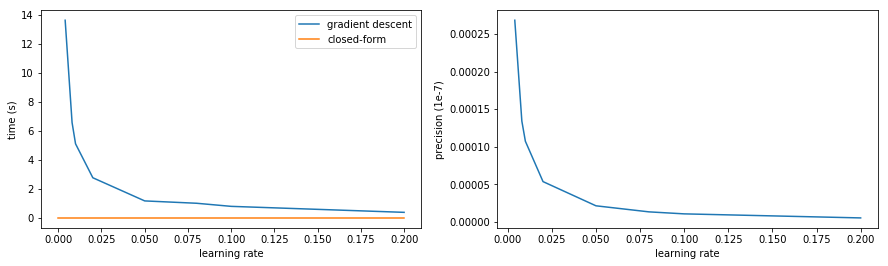

In [18]:
# iterations_norm = (np.array(iterations) - np.min(iterations)) / (np.max(iterations) - np.min(iterations))
# # error_norm = (np.array(error) - np.min(error)) / (np.max(error) - np.min(error))
error_mean = [e.mean() for e in error]
# error_norm = (np.array(error_mean) - np.min(error_mean)) / (np.max(error_mean) - np.min(error_mean))
# time_norm = (np.array(times) - np.min(times)) / (np.max(times) - np.min(times))

# # plt.plot(rates[2:10], iterations_norm[2:10] * 70)
# plt.plot(rates[2:10], error_norm[2:10] * 10)
# plt.plot(rates[2:10], time_norm[2:10])
# plt.plot([0, .2], [time_closed_form, time_closed_form])
# plt.xlabel('learning rate')
# plt.legend(['gd error', 'gd time', 'closed-form time'])
fig = plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(rates[2:10], times[2:10])
plt.plot([0, .2], [time_closed_form, time_closed_form])
plt.xlabel('learning rate')
plt.ylabel('time (s)')
plt.legend(['gradient descent', 'closed-form'])
plt.subplot(1,2,2)
plt.plot(rates[2:10], error_mean[2:10])
plt.xlabel('learning rate')
plt.ylabel('precision (1e-7)')

In [20]:
import metric
X_train, y_train, X_val, y_val, X_test, y_test = load_data('most_important_features')
test_model_closed = clf.LinearRegressionMSE()
test_model_closed.fit(X_train, y_train)
y_pred = test_model_closed.pred(X_train)
y_pred_val = test_model_closed.pred(X_val)
y_pred_test = test_model_closed.pred(X_test)
mse_train = metric.mse(y_train, y_pred)
mse_val = metric.mse(y_val, y_pred_val)
mse_test = metric.mse(y_test, y_pred_test)
print(mse_train,mse_val,mse_test)

# test_model_closed.w

1.0375588026545317 0.9954419763670966 1.2648622481276621


##### See residuals

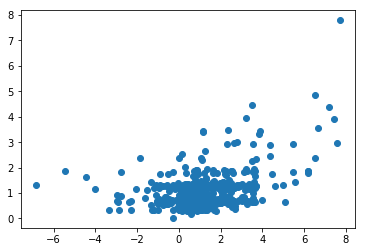

In [21]:
plt.plot(y_test, y_pred_test, 'o')

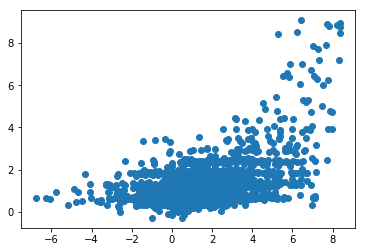

In [22]:
plt.plot(y_train, y_pred, 'o')